## *Statistics coded:* Government Finance Statistics

Prepared by [**Bonamino Luca**](luca.bonamino@hotmail.com)

This notebook aims at illustrating the *Statistics Expplained* article on [government finance statistics](https://ec.europa.eu/eurostat/statistics-explained/index.php/Government_finance_statistic).


## Settings required

### Built-il libraries

In [1]:
import requests
import json
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#from prettytable import PrettyTable

### Costum libraries

In [2]:
costum_lib_locations = ['../src']
for location in costum_lib_locations:
    if location not in sys.path:
        sys.path.append('../src')
import requestLib
import dataDealer

### Variables needed in the notebook

In [3]:
noCountry = ['European Union - 27 countries (2007-2013)' ,
             'European Union - 25 countries (2004-2006)',
             'European Union - 15 countries (1995-2004)',
             'Euro area - 11 countries (1999-2000)',
             'Euro area - 12 countries (2001-2006)',
             'Euro area - 13 countries (2007)',
             'Euro area - 15 countries (2008)',
             'Euro area - 16 countries (2009-2010)',
             'Euro area - 18 countries (2014)',
             'Euro area - 17 countries (2011-2013)',
             'Switzerland'
            ]

clean_country = {'Germany': 'Germany',
                 'Euro area - 19' : 'Euro Area (EA-19)', 
                 'European Union - 27 countries (from ': 'EU-27', 
                 'European Union - 28' : 'EU-28'}

host_url = "http://ec.europa.eu/eurostat/wdds/rest/data/v2.1/json/en/"

def assign_reference(data, multiplicity='time'):
    lines = list(list(data['dimension']['geo']['category'].values())[1].values())
    columns= list(list(data['dimension'][multiplicity]['category'].values())[1].values())
    return {'lines' : lines, 'columns': columns}

client = requestLib.RequestHandeler(host_url)

# Public Balance 2018 and 2019

[+] OK! Data recieved
	Succesful response


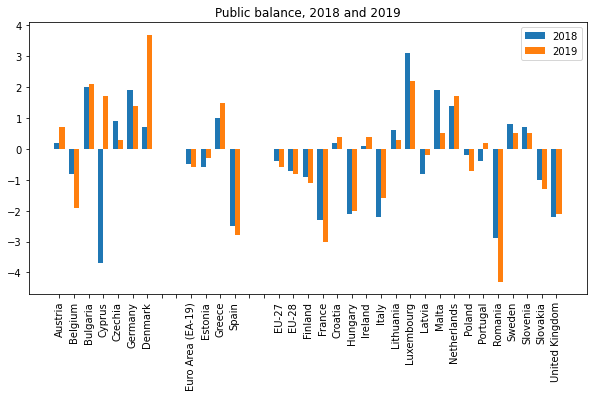

In [4]:
#%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]

args = requestLib.args_to_dict('table= gov_10dd_edpt1', 'na_item=B9', 'precision=1', 'unit=PC_GDP', 'time=2018,2019','sector=S13')

response = client.get_request(args)

frame = assign_reference(response.data['dict'])
country = frame['lines']
times = frame['columns']
values = list(response.data['dict']['value'].values())


years, country = dataDealer.json_to_data(lines=country, 
                                         columns=times, 
                                         values=values, 
                                         remove_list=noCountry, 
                                         void_item=True, 
                                         clean_dict=clean_country)

plot_x_labels = dataDealer.clean_label(lines=country, remove_list=noCountry)
pos = np.arange(len(plot_x_labels))

fig, ax = plt.subplots()
plt.title("Public balance, 2018 and 2019")
ax.set_xticks(pos)
ax.set_xticklabels(plot_x_labels, rotation = 90)
width = 0.35

ax.bar(pos -  width/2., list(years['2018'].values()),  width, label='2018')
ax.bar(pos +  width/2., list(years['2019'].values()),  width, label='2019')
plt.legend(loc='upper right')

plt.show()


# Public Balance and General Governement Debt, 2016-2019

In [5]:
args = requestLib.args_to_dict('table= gov_10dd_edpt1', 
                    'na_item=B9', 
                    'precision=1', 
                    'unit=PC_GDP', 
                    'time=2016,2017,2018,2019',
                    'sector=S13')

response = client.get_request(args) 

frame = assign_reference(response.data['dict'])
country = frame['lines']
times = frame['columns']
values = list(response.data['dict']['value'].values())
years, country = dataDealer.json_to_data(lines=country, 
                                         columns=times, 
                                         values=values, 
                                         remove_list=noCountry, 
                                         void_item=False, 
                                         clean_dict=clean_country)

balance = dataDealer.subjason_to_DataFrame(lines=country, columns=times, subDict=years)


args = requestLib.args_to_dict('table= gov_10dd_edpt1', 
                    'na_item=GD', 
                    'precision=1', 
                    'unit=PC_GDP', 
                    'time=2016,2017,2018,2019',
                    'sector=S13')
response = client.get_request(args) 

frame = assign_reference(response.data['dict'])
times = frame['lines']
country = frame['columns']
values = list(response.data['dict']['value'].values())

years, country = dataDealer.json_to_data(lines=country, 
                                         columns=times, 
                                         values=values, 
                                         remove_list=noCountry, 
                                         void_item=False, 
                                         clean_dict=clean_country)

debt = dataDealer.subjason_to_DataFrame(lines=country, columns=times, subDict=years)

result = pd.concat([balance, debt], axis=1, sort=False)
#print(result)
######
#### TO DO: print the full table

[+] OK! Data recieved
	Succesful response
[+] OK! Data recieved
	Succesful response


## General government debt, 2019 and 2018

[+] OK! Data recieved
	Succesful response


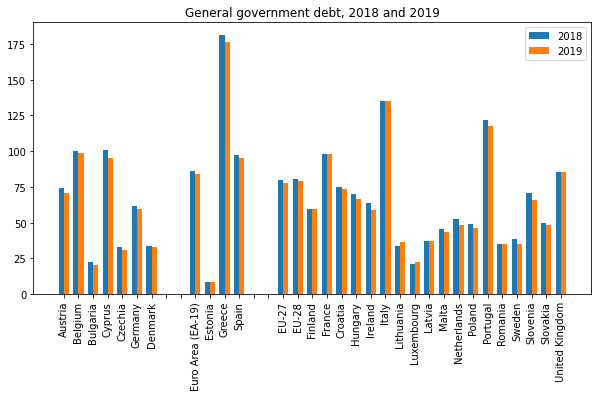

In [6]:
args = requestLib.args_to_dict('table= gov_10dd_edpt1', 
                    'na_item=GD', 
                    'precision=1', 
                    'unit=PC_GDP', 
                    'time=2018,2019',
                    'sector=S13')


response = client.get_request(args)

frame = assign_reference(response.data['dict'])
country = frame['lines']
times = frame['columns']
values = list(response.data['dict']['value'].values())

years, country = dataDealer.json_to_data(lines=country, 
                                         columns=times, 
                                         values=values, 
                                         remove_list=noCountry, 
                                         void_item=True, 
                                         clean_dict=clean_country)
plot_x_labels = dataDealer.clean_label(lines=country, remove_list=noCountry)

pos = np.arange(len(plot_x_labels))

fig, ax = plt.subplots()
plt.title("General government debt, 2018 and 2019")
ax.set_xticks(pos)
ax.set_xticklabels(plot_x_labels, rotation = 90)
width = 0.35

ax.bar(pos -  width/2., list(years['2018'].values()),  width, label='2018')
ax.bar(pos +  width/2., list(years['2019'].values()),  width, label='2019')
plt.legend(loc='upper right')

plt.show()

## Government revenu and expenditure 2009 - 2019 

### Development of total expenditure and total revenue 2009-2019 (% of GDP)

[+] OK! Data recieved
	Succesful response
[+] OK! Data recieved
	Succesful response


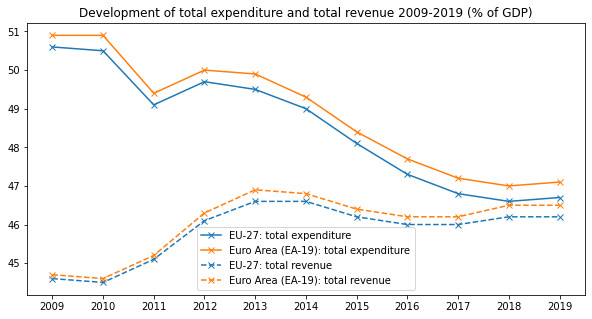

In [13]:
y = {'total expenditure': {'EU-27':[],'Euro Area (EA-19)' :[] }, 
     'total revenue': {'EU-27':[],'Euro Area (EA-19)' :[] }
     }

args = requestLib.args_to_dict('table=gov_10a_main', 
                    'na_item=TE', 
                    'precision=1', 
                    'unit=PC_GDP', 
                    'time= 2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019',
                    'sector=S13')

response = client.get_request(args)
frame = assign_reference(response.data['dict'])
countries = frame['lines']
times = frame['columns']
expendures = dataDealer.check_data_by_status(response.data['dict'])

expenditures,  countries = dataDealer.json_to_data(lines=countries, 
                                         columns=times, 
                                         values=expendures,
                                         clean_dict=clean_country)


for country in y['total expenditure']:
    for year in expenditures:
        y['total expenditure'][country].append(expenditures[year][country])
        
args = requestLib.args_to_dict('table=gov_10a_main', 
                    'na_item=TR', 
                    'precision=1', 
                    'unit=PC_GDP', 
                    'time= 2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019',
                    'sector=S13')

response = client.get_request(args)
revenues = dataDealer.check_data_by_status(response.data['dict'])
frame = assign_reference(response.data['dict'])
countries = frame['lines']
times = frame['columns']


revenues, countries = dataDealer.json_to_data(lines=countries, 
                                         columns=times, 
                                         values=revenues,
                                         clean_dict=clean_country)

for country in y['total revenue']:
    for year in revenues:
        y['total revenue'][country].append(revenues[year][country])

##### PLOT
plot_colors = ['C0', 'C1']
plt.title("Development of total expenditure and total revenue 2009-2019 (% of GDP)")
x = list(revenues.keys())
for measure in y:
    i = 0
    for country in y[measure]:
        if measure == 'total revenue':
            line_style = '--'
        else:
            line_style = '-'   
        plt.plot(x,y[measure][country],ls=line_style, marker='x', label='%s: %s' % (country, measure), color=plot_colors[i])
        i += 1
plt.legend(loc='lower center')
plt.show()

### Development of total expenditure and total revenue 2009-2019 (Billion EUR)

[+] OK! Data recieved
	Succesful response
[+] OK! Data recieved
	Succesful response


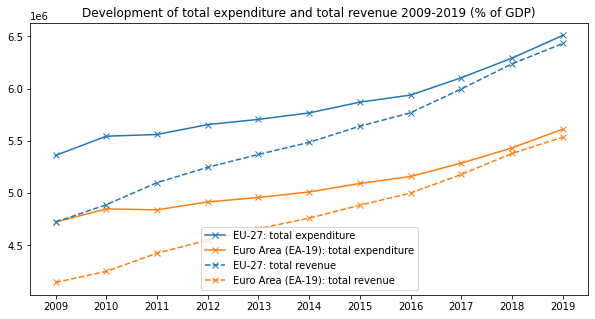

In [14]:
y = {'total expenditure': {'EU-27':[],'Euro Area (EA-19)' :[] }, 
     'total revenue': {'EU-27':[],'Euro Area (EA-19)' :[] }
     }

args = requestLib.args_to_dict('table=gov_10a_main', 
                    'na_item=TE', 
                    'precision=1', 
                    'unit=MIO_EUR', 
                    'time= 2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019',
                    'sector=S13')

response = client.get_request(args)
frame = assign_reference(response.data['dict'])
countries = frame['lines']
times = frame['columns']
expendures = dataDealer.check_data_by_status(response.data['dict'])

expenditures,  countries = dataDealer.json_to_data(lines=countries, 
                                         columns=times, 
                                         values=expendures,
                                         clean_dict=clean_country)


for country in y['total expenditure']:
    for year in expenditures:
        y['total expenditure'][country].append(expenditures[year][country])
        
args = requestLib.args_to_dict('table=gov_10a_main', 
                    'na_item=TR', 
                    'precision=1', 
                    'unit=MIO_EUR', 
                    'time= 2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019',
                    'sector=S13')

response = client.get_request(args)
revenues = dataDealer.check_data_by_status(response.data['dict'])
frame = assign_reference(response.data['dict'])
countries = frame['lines']
times = frame['columns']


revenues, countries = dataDealer.json_to_data(lines=countries, 
                                         columns=times, 
                                         values=revenues,
                                         clean_dict=clean_country)

for country in y['total revenue']:
    for year in revenues:
        y['total revenue'][country].append(revenues[year][country])

##### PLOT
plot_colors = ['C0', 'C1']
plt.title("Development of total expenditure and total revenue 2009-2019 (% of GDP)")
x = list(revenues.keys())
for measure in y:
    i = 0
    for country in y[measure]:
        if measure == 'total revenue':
            line_style = '--'
        else:
            line_style = '-'   
        plt.plot(x,y[measure][country],ls=line_style, marker='x', label='%s: %s' % (country, measure), color=plot_colors[i])
        i += 1
plt.legend(loc='lower center')
plt.show()

[+] OK! Data recieved
	Succesful response


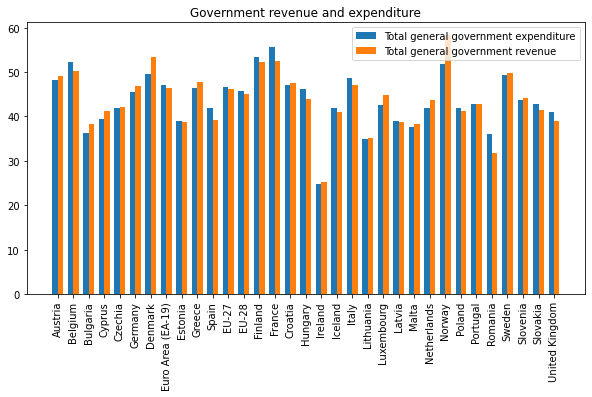

In [9]:
args = requestLib.args_to_dict('table=gov_10a_main', 
                    'na_item=TE,TR', 
                    'precision=1', 
                    'unit=PC_GDP', 
                    'time= 2019',
                    'sector=S13')

response = client.get_request(args)

values = dataDealer.check_data_by_status(response.data['dict'], toZero=True)

frame = assign_reference(response.data['dict'], multiplicity='na_item')
countries = frame['lines']
na_items = frame['columns']

values, countries = dataDealer.json_to_data(lines=countries, 
                                            columns=na_items, 
                                            values=values,
                                            remove_list=noCountry, 
                                            void_item=False, 
                                            clean_dict=clean_country,
                                            multiple_key='na_item')


plot_x_labels = dataDealer.clean_label(lines=countries, remove_list=noCountry)

pos = np.arange(len(plot_x_labels))

fig, ax = plt.subplots()
plt.title("Government revenue and expenditure")
ax.set_xticks(pos)
ax.set_xticklabels(plot_x_labels, rotation = 90)
width = 0.35

ax.bar(pos -  width/2., list(values['Total general government expenditure'].values()),  width, label='Total general government expenditure')
ax.bar(pos +  width/2., list(values['Total general government revenue'].values()),  width, label='Total general government revenue')
plt.legend(loc='upper right')

plt.show()

### Restore import settings

In [10]:
# lanch as last commend to restore the previous python import settings
for location in costum_lib_locations:
    try:
        sys.path.remove(location)
    except ValueError:
        print("path already removed")